## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline

train, test = keras.datasets.cifar10.load_data()

## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

Using TensorFlow backend.


In [2]:
from keras.layers import Input, Dense, BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):    
    """
    Build your own model
    """
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## 1.請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響

In [3]:
## 超參數設定
"""
Set your hyper-parameters
"""
epochs = 50
batch_size = 256
patience = [2, 5, 8]
factor = [0.2, 0.5, 0.8]

In [4]:
results = {}
# 載入 Callbacks
"""
Write your training loop and show the results
"""
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
for pat in patience:
    for fac in factor:
        reduce_lr = ReduceLROnPlateau(factor=fac, min_lr=1e-12, monitor='val_loss', patience=pat, verbose=1)
        
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f'patience = {pat}, factor = {fac}')
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True, momentum=0.95)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
 
        model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True, 
                  callbacks=[earlystop, reduce_lr])

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        name_tag = f'patience = {pat}, factor = {fac}'
        results[name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 
                             'train-acc': train_acc, 'valid-acc': valid_acc}

patience = 2, factor = 0.2
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
___________________________________________

50000/50000 [==============================] - 6s 122us/step - loss: 1.2246 - acc: 0.5673 - val_loss: 1.6012 - val_acc: 0.4493
Epoch 6/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.1786 - acc: 0.5802 - val_loss: 1.7697 - val_acc: 0.4069

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.0789 - acc: 0.6171 - val_loss: 1.3943 - val_acc: 0.5107
Epoch 8/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.0173 - acc: 0.6387 - val_loss: 1.4331 - val_acc: 0.5066
Epoch 9/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.9839 - acc: 0.6522 - val_loss: 1.4295 - val_acc: 0.5035

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
Epoch 10/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.9036 - acc: 0.6827 - val_loss: 1.3442 - val_acc: 0.5348
Epoch 11/50
50000/500

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.6889 - acc: 0.4044 - val_loss: 1.7316 - val_acc: 0.3787
Epoch 2/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.4512 - acc: 0.4852 - val_loss: 1.7645 - val_acc: 0.3783
Epoch 3/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.3571 - acc: 0.5182 - val_loss: 1.5015 - val_acc: 0.4631
Epoch 4/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2897 - acc: 0.5423 - val_loss: 1.6414 - val_acc: 0.4233
Epoch 5/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.2313 - acc: 0.5608 - val_loss: 1.7682 - val_acc: 0.3918
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.1879 - acc: 0.5778 - val_loss: 1.7212 - val_acc: 0.4157
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.1446 - acc: 0.5928 - val_loss: 1.6567 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.6879 - acc: 0.4075 - val_loss: 1.6722 - val_acc: 0.4020
Epoch 2/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.4538 - acc: 0.4828 - val_loss: 1.6018 - val_acc: 0.4332
Epoch 3/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.3563 - acc: 0.5198 - val_loss: 1.6149 - val_acc: 0.4299
Epoch 4/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.2880 - acc: 0.5416 - val_loss: 1.6138 - val_acc: 0.4237
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.2317 - acc: 0.5619 - val_loss: 1.5944 - val_acc: 0.4292s - loss: 1.2291
Epoch 6/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.1822 - acc: 0.5813 - val_loss: 1.5420 - val_acc: 0.4577
Epoch 7/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.1411 - acc: 0.5946 - va

50000/50000 [==============================] - 6s 112us/step - loss: 0.4848 - acc: 0.8436 - val_loss: 1.5290 - val_acc: 0.5475
Epoch 24/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.4609 - acc: 0.8524 - val_loss: 1.5495 - val_acc: 0.5478
Epoch 00024: early stopping
patience = 8, factor = 0.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization

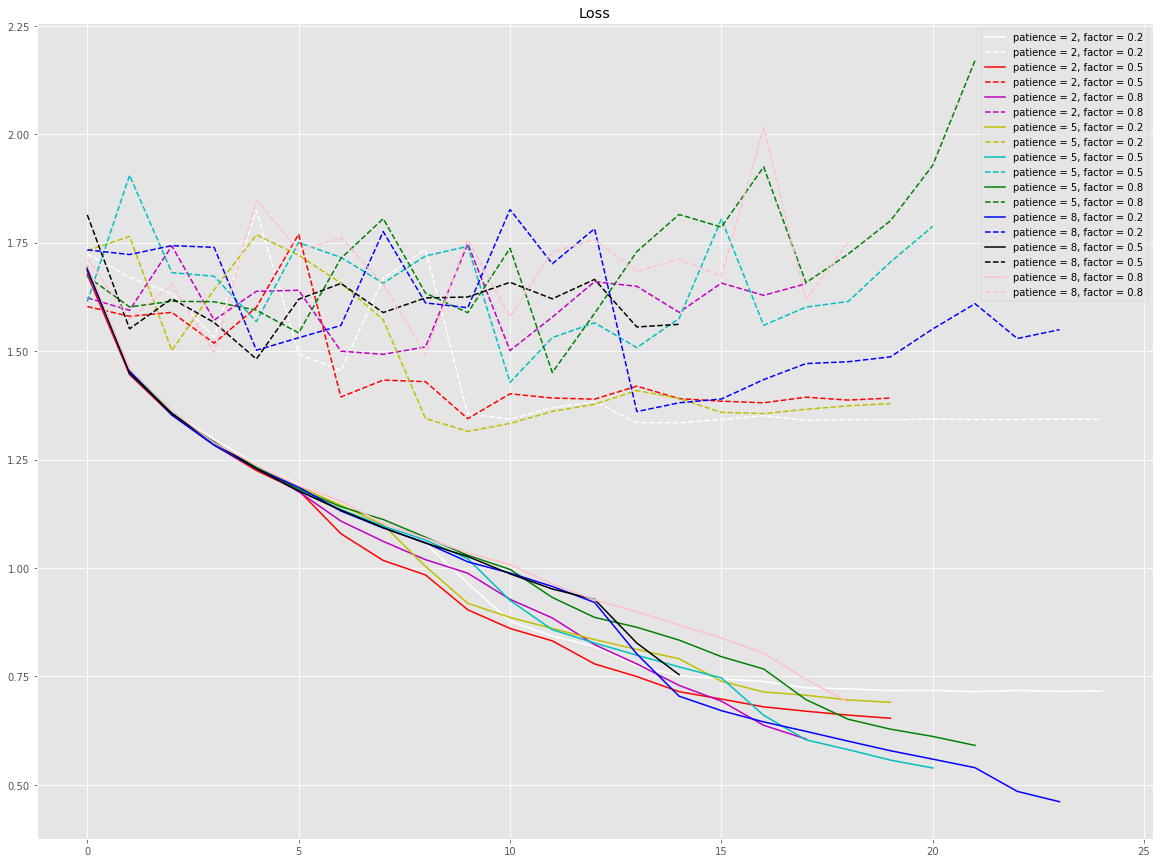

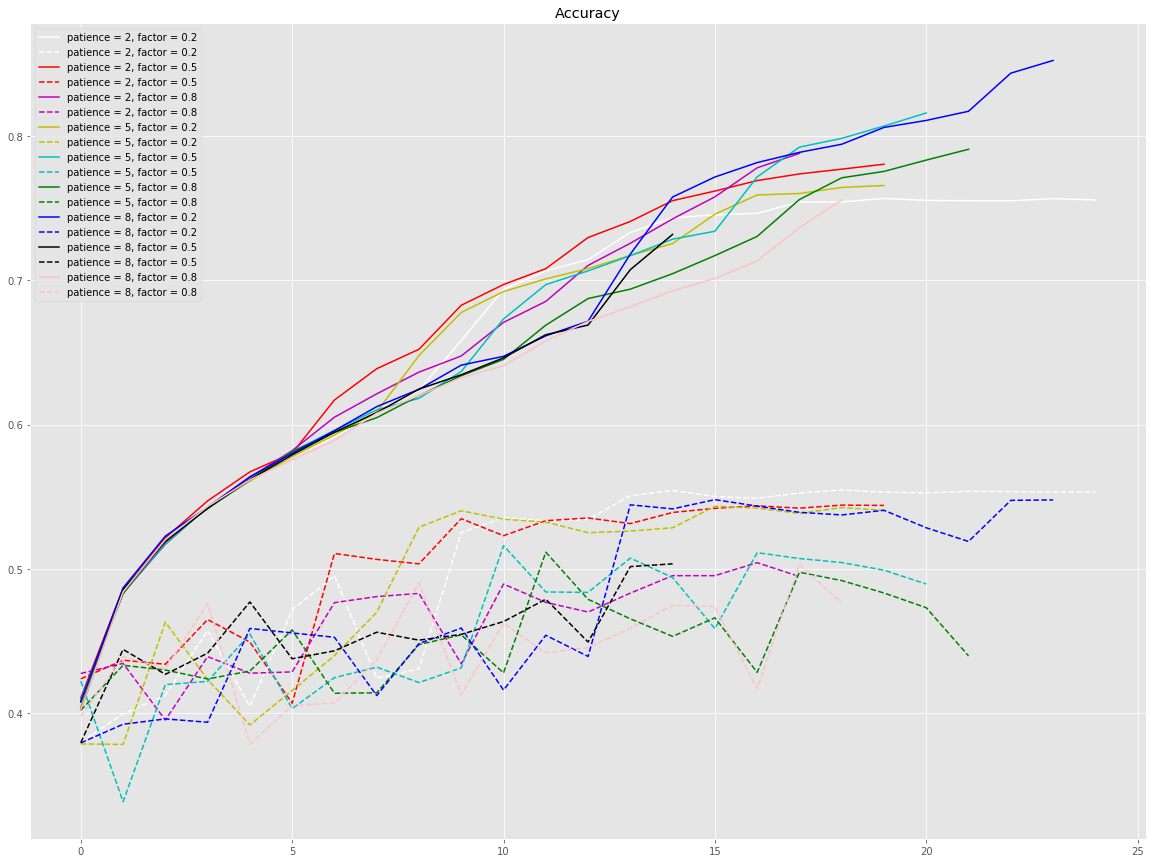

In [5]:
# 繪製結果
"""
plot the results
"""
plt.style.use('ggplot')
color_bar = ['w', 'r', 'm', 'y', 'c', 'g', 'b', 'k', 'pink', 'orange', 'purple', 'gray']

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 2.請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [8]:
## 超參數設定
"""
Set your hyper-parameters
"""
epochs = 50
batch_size = 256
patience = [2, 5, 8]

def optimizer_chooser(name='Adam', lr=1e-2):
    optimizer = {'SGD': keras.optimizers.SGD(lr=lr, nesterov=True, momentum=0.95), 
                 'RMSprop': keras.optimizers.RMSprop(lr=lr),
                 'Adam': keras.optimizers.Adam(lr=lr)}
    return optimizer[name]
optimizer = ['SGD', 'RMSprop', 'Adam']

In [9]:
results = {}
# 載入 Callbacks
"""
Write your training loop and show the results
"""
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
for opt in optimizer:
    for pat in patience:
        reduce_lr = ReduceLROnPlateau(factor=0.2, min_lr=1e-12, monitor='val_loss', patience=pat, verbose=1)
        
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f'optimizer = {opt}, patience = {pat}')
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer_choosed = optimizer_chooser(name=opt)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer_choosed)
 
        model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True, 
                  callbacks=[earlystop, reduce_lr])

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        
        name_tag = f'optimizer = {opt}, patience = {pat}'
        results[name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 
                             'train-acc': train_acc, 'valid-acc': valid_acc}

optimizer = SGD, patience = 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)      

50000/50000 [==============================] - 6s 111us/step - loss: 0.8881 - acc: 0.6886 - val_loss: 1.3545 - val_acc: 0.5342
Epoch 13/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.7909 - acc: 0.7286 - val_loss: 1.3396 - val_acc: 0.5413
Epoch 14/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.7548 - acc: 0.7400 - val_loss: 1.3659 - val_acc: 0.5385
Epoch 15/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.7279 - acc: 0.7502 - val_loss: 1.4088 - val_acc: 0.5355
Epoch 16/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.7045 - acc: 0.7565 - val_loss: 1.4168 - val_acc: 0.5396
Epoch 17/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.6814 - acc: 0.7660 - val_loss: 1.4807 - val_acc: 0.5234
Epoch 18/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.6591 - acc: 0.7748 - val_loss: 1.4425 - val_acc: 0.5384

Epoch 00018: ReduceLROnPlateau reducin

50000/50000 [==============================] - 8s 152us/step - loss: 1.8693 - acc: 0.3408 - val_loss: 2.3755 - val_acc: 0.2848
Epoch 2/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.5762 - acc: 0.4340 - val_loss: 2.5484 - val_acc: 0.2375
Epoch 3/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.4719 - acc: 0.4713 - val_loss: 1.9648 - val_acc: 0.3407
Epoch 4/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4011 - acc: 0.5000 - val_loss: 2.0913 - val_acc: 0.3252
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.3497 - acc: 0.5179 - val_loss: 1.7451 - val_acc: 0.4089
Epoch 6/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.3048 - acc: 0.5311 - val_loss: 1.8143 - val_acc: 0.3940
Epoch 7/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.2633 - acc: 0.5475 - val_loss: 2.0597 - val_acc: 0.3548

Epoch 00007: ReduceLROnPlateau reducing lear

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 7s 135us/step - loss: 0.9502 - acc: 0.6629 - val_loss: 1.2746 - val_acc: 0.5515
Epoch 13/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.9351 - acc: 0.6672 - val_loss: 1.2796 - val_acc: 0.5537
Epoch 14/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.9257 - acc: 0.6726 - val_loss: 1.2935 - val_acc: 0.5503

Epoch 00014: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.
Epoch 15/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.9108 - acc: 0.6773 - val_loss: 1.2881 - val_acc: 0.5515
Epoch 16/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.9072 - acc: 0.6771 - val_loss: 1.2897 - val_acc: 0.5517

Epoch 00016: ReduceLROnPlateau reducing learning rate to 1.599999814061448e-05.
Epoch 17/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.9051 - acc: 0.6782 - val_loss: 1.2890 - val_acc: 0.5520
Epoch 18/50
5000

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.7842 - acc: 0.3602 - val_loss: 1.8879 - val_acc: 0.3482
Epoch 2/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.5527 - acc: 0.4410 - val_loss: 1.8646 - val_acc: 0.3613
Epoch 3/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.4554 - acc: 0.4790 - val_loss: 1.8084 - val_acc: 0.3799
Epoch 4/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.3989 - acc: 0.4998 - val_loss: 1.5992 - val_acc: 0.4404
Epoch 5/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.3433 - acc: 0.5194 - val_loss: 1.5507 - val_acc: 0.4577
Epoch 6/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.2980 - acc: 0.5353 - val_loss: 1.7681 - val_acc: 0.3945
Epoch 7/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.2637 - acc: 0.5480 - val_loss: 1.5620 -

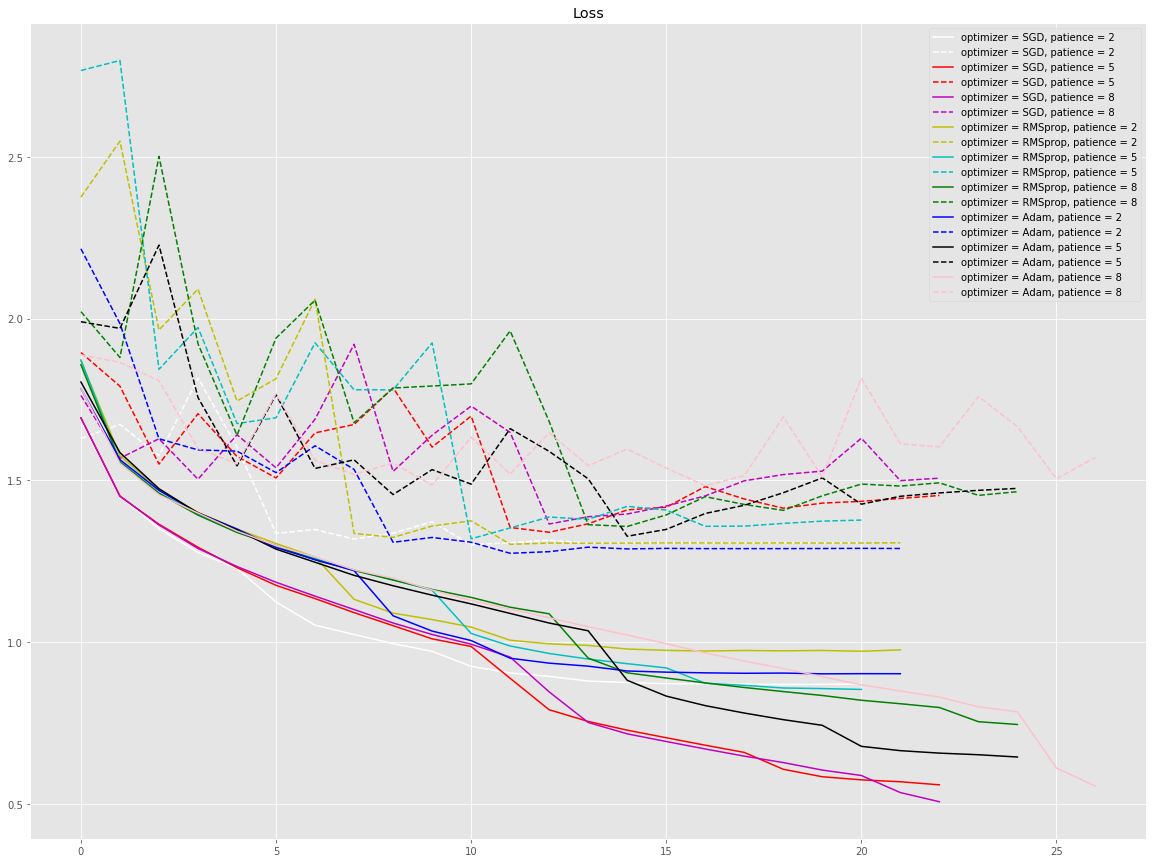

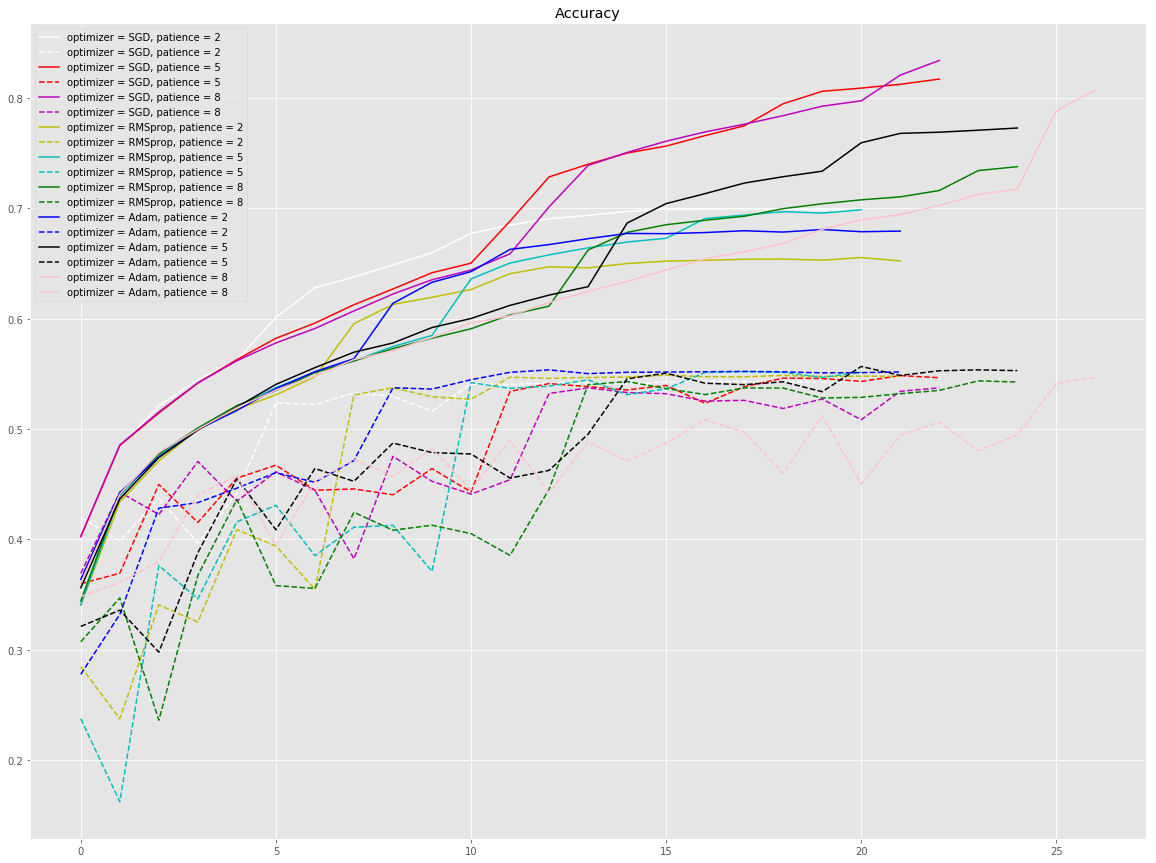

In [10]:
# 繪製結果
"""
plot the results
"""
plt.style.use('ggplot')
color_bar = ['w', 'r', 'm', 'y', 'c', 'g', 'b', 'k', 'pink', 'orange', 'purple', 'gray']

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20, 15))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## patience , factor 都不要太大效果較好